In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
evaluation = execute_ai_model(start_time=0, finish_time=None, scheme='mtd_ai', mtd_interval=None, custom_strategies=None,
                       checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                       target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False,
                       epsilon=1.0)

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [ ]:
# # evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100)
evaluation = execute_ai_simulation(start_time=0, finish_time=None, scheme='random', mtd_interval=None, custom_strategies=None,
                       checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                       target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False)

NameError: name 'execute_ai_simulation' is not defined

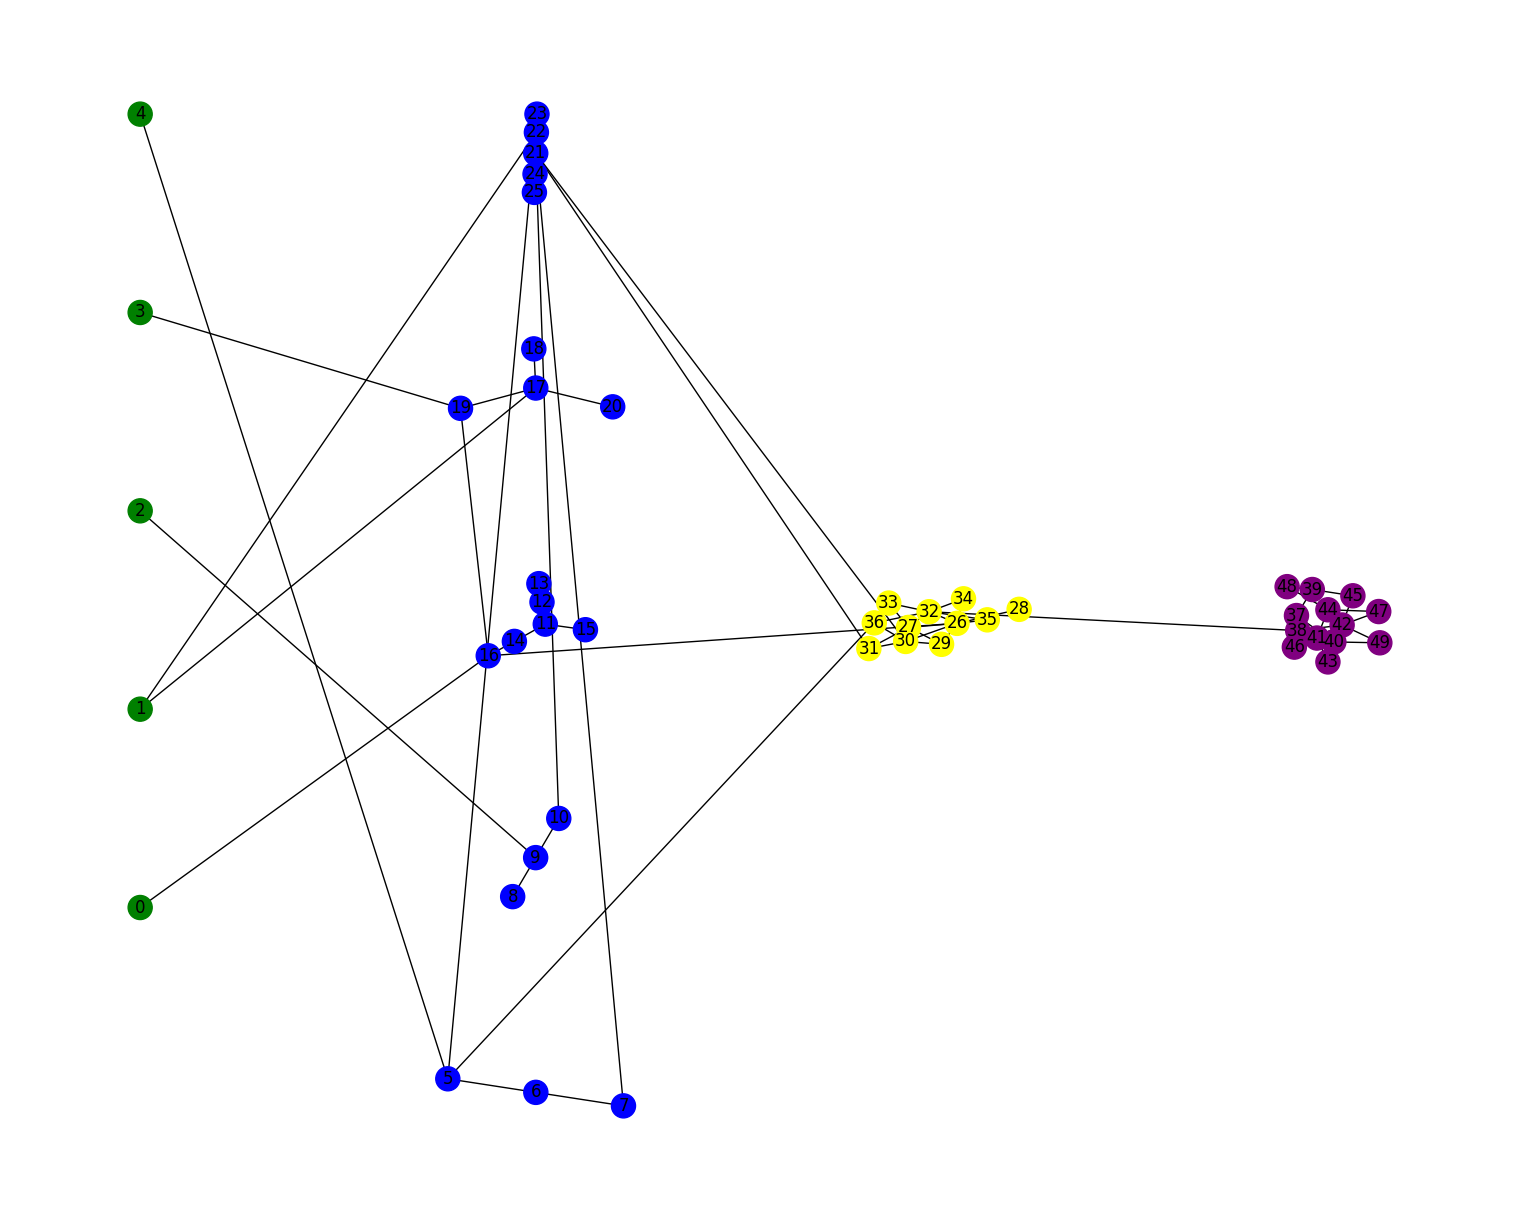

In [ ]:
evaluation.get_network().draw()
plt.show()

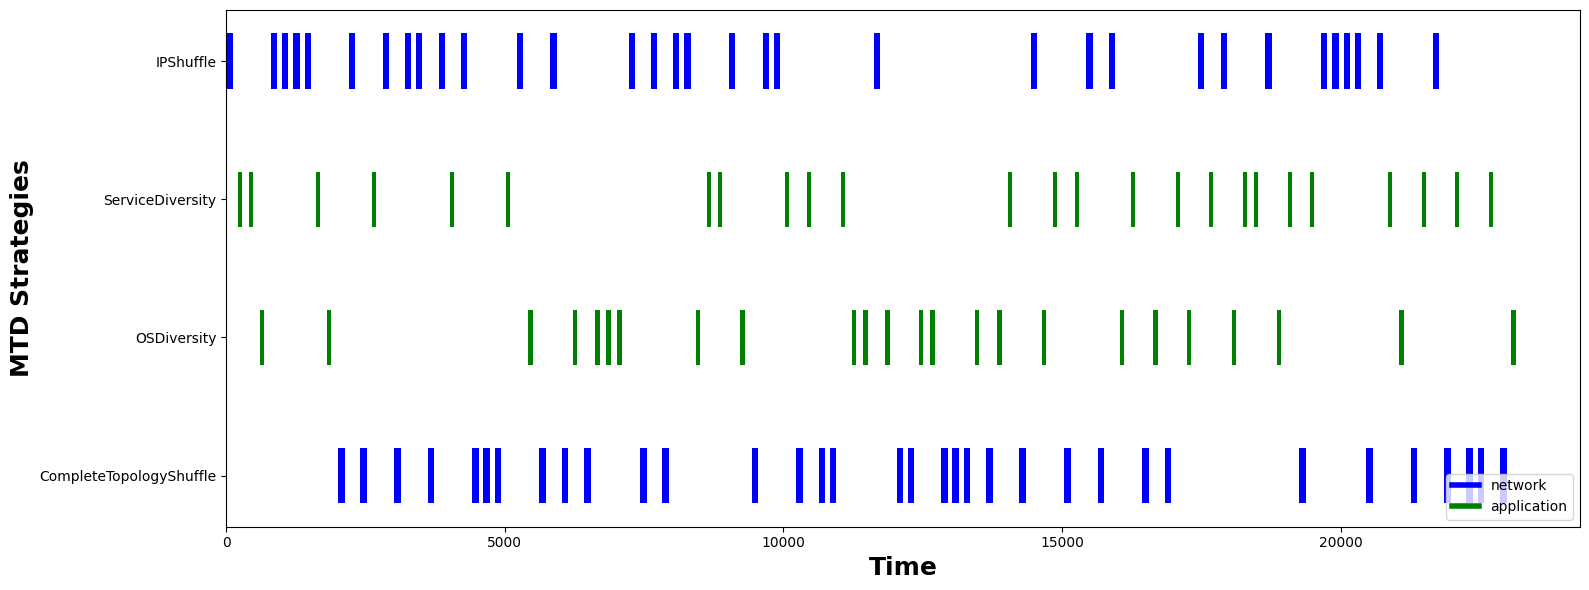

In [ ]:
evaluation.visualise_mtd_operation()

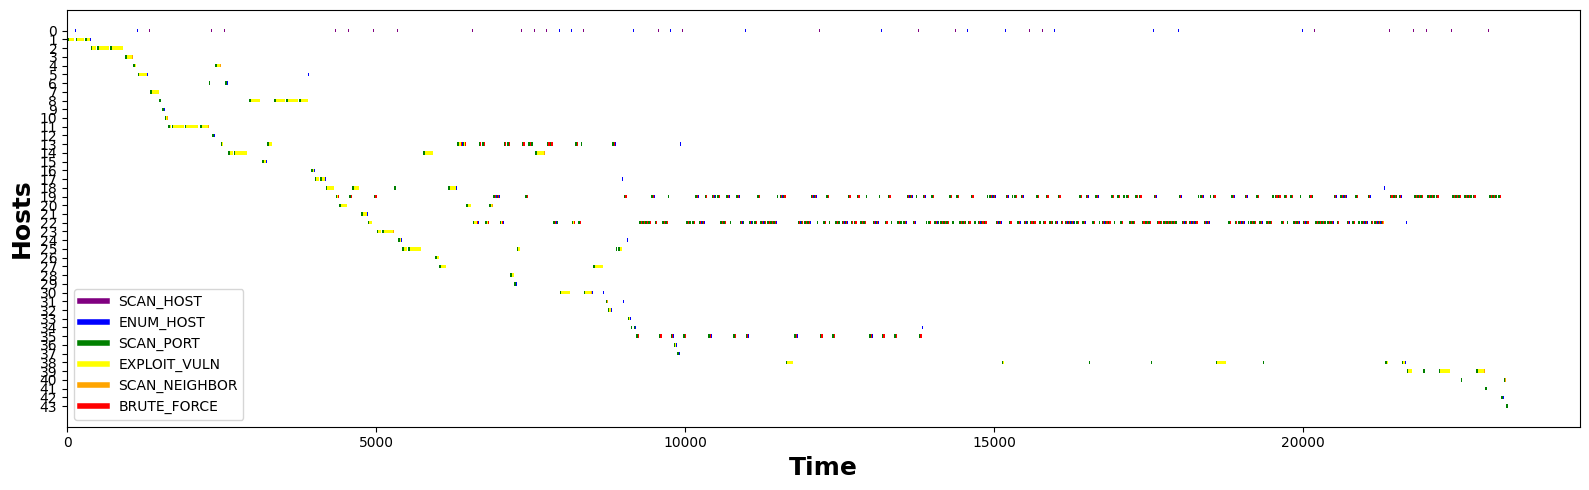

In [ ]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  41


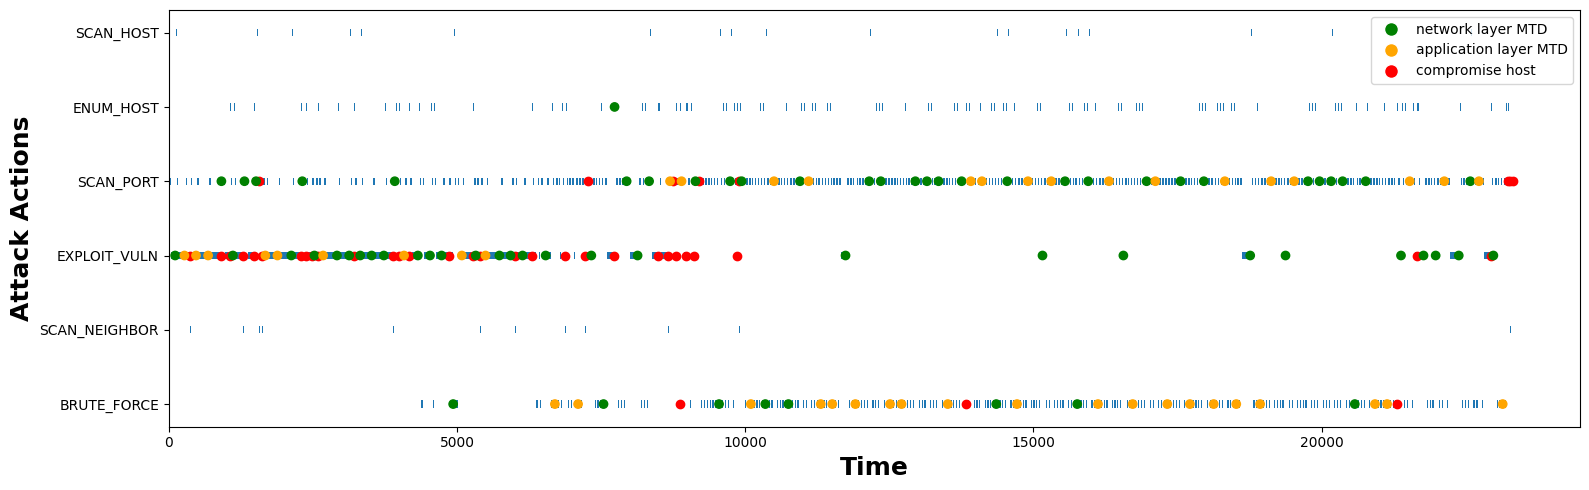

In [ ]:
evaluation.visualise_attack_operation()

In [ ]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
39,EXPLOIT_VULN,350.858758,373.568076,22.709318,0,e801de99-3dbc-42fb-96d6-67b7ce47efac,0,e801de99-3dbc-42fb-96d6-67b7ce47efac,2,30,0,"[Mari, Josselyn, Elspeth, Constancy, Gertie]",None,None,yellow,1
100,EXPLOIT_VULN,892.699662,900.861248,8.161586,8,9948b318-b937-4581-916e-b28aa0d01a79,8,9948b318-b937-4581-916e-b28aa0d01a79,1,84,1,"[Moria, Ronnica]",None,None,yellow,2
116,EXPLOIT_VULN,1041.782127,1056.830101,15.047974,13,d6e0a68d-3726-4b67-9ca4-c4a5a06a570a,13,d6e0a68d-3726-4b67-9ca4-c4a5a06a570a,2,94,2,"[Jeanelle, Carlotta, Cristy]",None,None,yellow,3
149,EXPLOIT_VULN,1287.859156,1294.843376,6.984220,5,9386b3d6-c105-4678-9aa7-3ab00df7a5e5,5,9386b3d6-c105-4678-9aa7-3ab00df7a5e5,1,119,3,"[Bette, Elvera, Shana, Cyndy]",None,None,yellow,5
172,EXPLOIT_VULN,1476.466485,1480.645707,4.179221,9,3ce46374-cdbb-4f4d-b4b4-212c96cb2e8c,9,3ce46374-cdbb-4f4d-b4b4-212c96cb2e8c,1,135,4,"[Sheryl, Carmel, Alexina]",None,None,yellow,7
179,SCAN_PORT,1544.550275,1569.550275,25.000000,11,5a023e49-9ff3-4afc-b13e-449c85ad65c3,11,5a023e49-9ff3-4afc-b13e-449c85ad65c3,1,136,5,"[Teri, Agnes, Dionne]",None,None,green,9
185,EXPLOIT_VULN,1614.189630,1622.898897,8.709268,10,3a101049-ee84-40a3-ae5c-ddd2ad9fb4af,10,3a101049-ee84-40a3-ae5c-ddd2ad9fb4af,1,138,6,"[Noell, Darsey, Allina, Merrie]",None,None,yellow,10
261,EXPLOIT_VULN,2275.244646,2288.107759,12.863113,14,a3e109a8-7279-4e28-86f6-2cb854b8e877,14,a3e109a8-7279-4e28-86f6-2cb854b8e877,2,202,7,"[Annissa, Joanna]",None,None,yellow,11
271,EXPLOIT_VULN,2380.573713,2381.140616,0.566903,21,585ef173-0259-4ed7-8c27-c09a2296a602,21,585ef173-0259-4ed7-8c27-c09a2296a602,1,205,8,"[Sondra, Guendolen, Terri, Florance]",None,None,yellow,12
282,EXPLOIT_VULN,2470.691902,2479.759391,9.067489,35,0ca2d7ac-9687-473d-a676-4bb53890966d,35,0ca2d7ac-9687-473d-a676-4bb53890966d,2,212,9,[Florida],None,None,yellow,4


In [ ]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
179,SCAN_PORT,1544.550275,1569.550275,25.0,11,5a023e49-9ff3-4afc-b13e-449c85ad65c3,11,5a023e49-9ff3-4afc-b13e-449c85ad65c3,1,136,5,"[Teri, Agnes, Dionne]",None,None,green,9
742,SCAN_PORT,7240.095248,7265.095248,25.0,41,7cf972d1-bc5d-44b1-812a-0100ad255160,41,7cf972d1-bc5d-44b1-812a-0100ad255160,1,506,22,[],None,None,green,29
873,SCAN_PORT,8716.268417,8741.268417,25.0,49,cf5d95f7-382e-4480-8cdc-652c14d84bf9,49,cf5d95f7-382e-4480-8cdc-652c14d84bf9,1,571,26,[Heather],None,None,green,31
919,SCAN_PORT,9167.184102,9192.184102,25.0,16,8888b23d-cc23-4412-b447-f11b79525cf5,16,8888b23d-cc23-4412-b447-f11b79525cf5,2,583,31,[Ruthanne],None,None,green,34
967,SCAN_PORT,9872.121726,9897.121726,25.0,26,1c674be9-e96b-4725-9c5b-f67298c97738,26,1c674be9-e96b-4725-9c5b-f67298c97738,1,585,33,[],None,None,green,37
1789,SCAN_PORT,23211.743991,23236.743991,25.0,47,9cf343a2-7e98-4c32-b0f6-65ca1b0add29,47,9cf343a2-7e98-4c32-b0f6-65ca1b0add29,1,663,38,[],None,None,green,42
1793,SCAN_PORT,23251.743991,23276.743991,25.0,46,e32e5f3c-ca65-44a1-9d00-8ec5992401cd,46,e32e5f3c-ca65-44a1-9d00-8ec5992401cd,2,663,39,[],None,None,green,40
1797,SCAN_PORT,23291.743991,23316.743991,25.0,40,e275aa02-2d71-4b5c-929e-c9d3889e45de,40,e275aa02-2d71-4b5c-929e-c9d3889e45de,1,663,40,[],None,None,green,43


In [ ]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
39,EXPLOIT_VULN,350.858758,373.568076,22.709318,0,e801de99-3dbc-42fb-96d6-67b7ce47efac,0,e801de99-3dbc-42fb-96d6-67b7ce47efac,2,30,0,"[Mari, Josselyn, Elspeth, Constancy, Gertie]",None,None,yellow,1
100,EXPLOIT_VULN,892.699662,900.861248,8.161586,8,9948b318-b937-4581-916e-b28aa0d01a79,8,9948b318-b937-4581-916e-b28aa0d01a79,1,84,1,"[Moria, Ronnica]",None,None,yellow,2
116,EXPLOIT_VULN,1041.782127,1056.830101,15.047974,13,d6e0a68d-3726-4b67-9ca4-c4a5a06a570a,13,d6e0a68d-3726-4b67-9ca4-c4a5a06a570a,2,94,2,"[Jeanelle, Carlotta, Cristy]",None,None,yellow,3
149,EXPLOIT_VULN,1287.859156,1294.843376,6.984220,5,9386b3d6-c105-4678-9aa7-3ab00df7a5e5,5,9386b3d6-c105-4678-9aa7-3ab00df7a5e5,1,119,3,"[Bette, Elvera, Shana, Cyndy]",None,None,yellow,5
172,EXPLOIT_VULN,1476.466485,1480.645707,4.179221,9,3ce46374-cdbb-4f4d-b4b4-212c96cb2e8c,9,3ce46374-cdbb-4f4d-b4b4-212c96cb2e8c,1,135,4,"[Sheryl, Carmel, Alexina]",None,None,yellow,7
185,EXPLOIT_VULN,1614.189630,1622.898897,8.709268,10,3a101049-ee84-40a3-ae5c-ddd2ad9fb4af,10,3a101049-ee84-40a3-ae5c-ddd2ad9fb4af,1,138,6,"[Noell, Darsey, Allina, Merrie]",None,None,yellow,10
261,EXPLOIT_VULN,2275.244646,2288.107759,12.863113,14,a3e109a8-7279-4e28-86f6-2cb854b8e877,14,a3e109a8-7279-4e28-86f6-2cb854b8e877,2,202,7,"[Annissa, Joanna]",None,None,yellow,11
271,EXPLOIT_VULN,2380.573713,2381.140616,0.566903,21,585ef173-0259-4ed7-8c27-c09a2296a602,21,585ef173-0259-4ed7-8c27-c09a2296a602,1,205,8,"[Sondra, Guendolen, Terri, Florance]",None,None,yellow,12
282,EXPLOIT_VULN,2470.691902,2479.759391,9.067489,35,0ca2d7ac-9687-473d-a676-4bb53890966d,35,0ca2d7ac-9687-473d-a676-4bb53890966d,2,212,9,[Florida],None,None,yellow,4
292,EXPLOIT_VULN,2582.104222,2587.943061,5.838840,15,6c79f6d6-334e-4ad8-bd67-ec361fa9beee,15,6c79f6d6-334e-4ad8-bd67-ec361fa9beee,3,215,10,[Lita],None,None,yellow,6


In [ ]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
886,BRUTE_FORCE,8846.674093,8866.674093,20.0,24,a5a82c60-85d7-406d-9ef5-300835220f48,24,a5a82c60-85d7-406d-9ef5-300835220f48,14,575,28,[],None,None,red,13
1208,BRUTE_FORCE,13810.257656,13830.257656,20.0,17,11018cf5-7a63-4567-bd1e-26dfe29df565,17,11018cf5-7a63-4567-bd1e-26dfe29df565,14,601,34,[Lizabeth],None,None,red,35
1639,BRUTE_FORCE,21281.255480,21301.255480,20.0,19,30752bfa-8ef5-4b61-a375-b6a1ba1d6409,19,30752bfa-8ef5-4b61-a375-b6a1ba1d6409,133,613,35,[],None,None,red,22


In [ ]:
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 1281.890654657493,
  'attack_success_rate': 0.35714285714285715,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0.005012615835140854},
 {'time_to_compromise': 2101.7285148252377,
  'attack_success_rate': 0.4166666666666667,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0.005012615835140854},
 {'time_to_compromise': 3955.24286540185,
  'attack_success_rate': 0.35714285714285715,
  'host_compromise_ratio': 0.3,
  'mtd_execution_frequency': 0.005012615835140854},
 {'time_to_compromise': 5623.940185716207,
  'attack_success_rate': 0.3225806451612903,
  'host_compromise_ratio': 0.4,
  'mtd_execution_frequency': 0.005012615835140854},
 {'time_to_compromise': 7055.514015630264,
  'attack_success_rate': 0.29069767441860467,
  'host_compromise_ratio': 0.5,
  'mtd_execution_frequency': 0.005012615835140854},
 {'time_to_compromise': 7341.604861744188,
  'attack_success_rate': 0.3191489361702128,
  'host_compromise_ratio': 0.6,
  'mtd_execution_